In [1]:
import spotiphy
import numpy as np
import pandas as pd
import matplotlib as mpl
import scanpy as sc
import squidpy as sq
import seaborn as sns
import anndata as ad
from matplotlib.colors import ListedColormap
import cv2
from tqdm import tqdm

### Cluster location

In [14]:
sample_name = '221'
results_folder = 'Results/AD Sample '+sample_name+'/decomposition/'
adata_st = sc.read_visium("F:/Ziqian Zheng/Spotiphy_data/ST/Sample"+sample_name+"/outs")
adata_st.var_names_make_unique()
cell_proportion = np.load('Results/AD Sample '+sample_name+'/proportion.npy')[:, 0]
adata_st.obs['proportion'] = cell_proportion
meta = pd.read_excel(results_folder+"MergeSTsimu.Microglia_meta_group.xlsx", header=0)
# meta = pd.read_excel(results_folder+"MergeST.M_meta_group.xlsx")
meta = meta[meta['samplename']=='NCF'+sample_name]
# meta = meta[meta['cell_type']=='Astro']
colors = ["#F8766d", "#00BFC4", "#C77CFF", "#7CAE00"]
cmap = ListedColormap(colors)

anndata.py (1832): Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [15]:
meta

,orig.ident,nCount_originalexp,nFeature_originalexp,cell_type,spot_name,n_cell,location_x,location_y,samplename,originalexp_snn_res.2,seurat_clusters,originalexp_snn_res.1,originalexp_snn_res.0.5,originalexp_snn_res.0.3,originalexp_snn_res.0.1,originalexp_snn_res.0.2,ID
278,SeuratProject,1000000.0,6404,Microglia,AAACCTCATGAAGTTG-1,1,2692,4968,NCF221,13,0,2,2,2,0,0,ST221simu_9354
279,SeuratProject,1000000.0,3018,Microglia,AAACGAGACGGTTGAT-1,1,6063,4762,NCF221,13,0,2,2,2,0,0,ST221simu_9355
280,SeuratProject,1000000.0,8035,Microglia,AAACGCCCGAGATCGG-1,1,7684,1726,NCF221,13,1,1,1,1,1,1,ST221simu_9356
281,SeuratProject,1000000.0,2013,Microglia,AAACTGCTGGCTCCAA-1,1,5392,5742,NCF221,13,0,2,2,2,0,0,ST221simu_9357
282,SeuratProject,1000000.0,7420,Microglia,AAAGACATGAAGTTTA-1,1,6784,1338,NCF221,13,1,1,1,1,1,1,ST221simu_9358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,SeuratProject,1000000.0,5862,Microglia,TTGTAAGGCCAGTTGG-1,1,6173,3980,NCF221,13,0,2,2,2,0,0,ST221simu_10168
1093,SeuratProject,1000000.0,4522,Microglia,TTGTGAACCTAATCCG-1,1,6687,6814,NCF221,13,0,2,2,0,0,0,ST221simu_10169
1094,SeuratProject,1000000.0,4246,Microglia,TTGTGCAGCCACGTCA-1,1,5789,7208,NCF221,13,0,0,0,0,0,0,ST221simu_10170
1095,SeuratProject,1000000.0,3614,Microglia,TTGTTGTGTGTCAAGA-1,1,5950,4372,NCF221,13,0,4,3,0,0,0,ST221simu_10171


In [18]:
cell_location = meta[['location_x', 'location_y']].values
spot_location = adata_st.obsm['spatial']
d = np.sum(np.abs(spot_location[:, :, np.newaxis] - cell_location.T), axis=1)
adata_st.obs['cluster'] = '-1'
adata_st.obs[['x', 'y']] = spot_location
for i in range(len(adata_st)):
    if min(d[i]) < 1:
        idx = np.where(d[i]==0)[0][0]
        adata_st.obs.iloc[i, -3] = str(meta.iloc[idx]['seurat_clusters'])

In [19]:
adata_st.obs

,in_tissue,array_row,array_col,proportion,cluster,x,y
AAACAAGTATCTCCCA-1,1,50,102,0.130652,-1,7360,6226
AAACACCAATAACTGC-1,1,59,19,0.142885,-1,2698,7120
AAACAGAGCGACTCCT-1,1,14,94,0.238186,-1,6900,2706
AAACAGCTTTCAGAAG-1,1,43,9,0.144926,-1,2131,5557
AAACAGGGTCTATATT-1,1,47,13,0.082285,-1,2357,5947
...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,1,31,77,0.124341,0,5950,4372
TTGTTTCACATCCAGG-1,1,58,42,0.280140,-1,3990,7018
TTGTTTCATTAGTCTA-1,1,60,30,0.139187,0,3316,7216
TTGTTTCCATACAACT-1,1,45,27,0.179614,-1,3143,5749


In [20]:
# HE = adata_st.obsm['spatial']
# HE[np.max(HE, axis=2)-np.min(HE, axis=2)<30] = [250, 250, 250]

anndata.py (1222): Trying to modify attribute `.obs` of view, initializing view as actual.
anndata.py (1222): Trying to modify attribute `.var` of view, initializing view as actual.
anndata.py (1222): Trying to modify attribute `.var` of view, initializing view as actual.


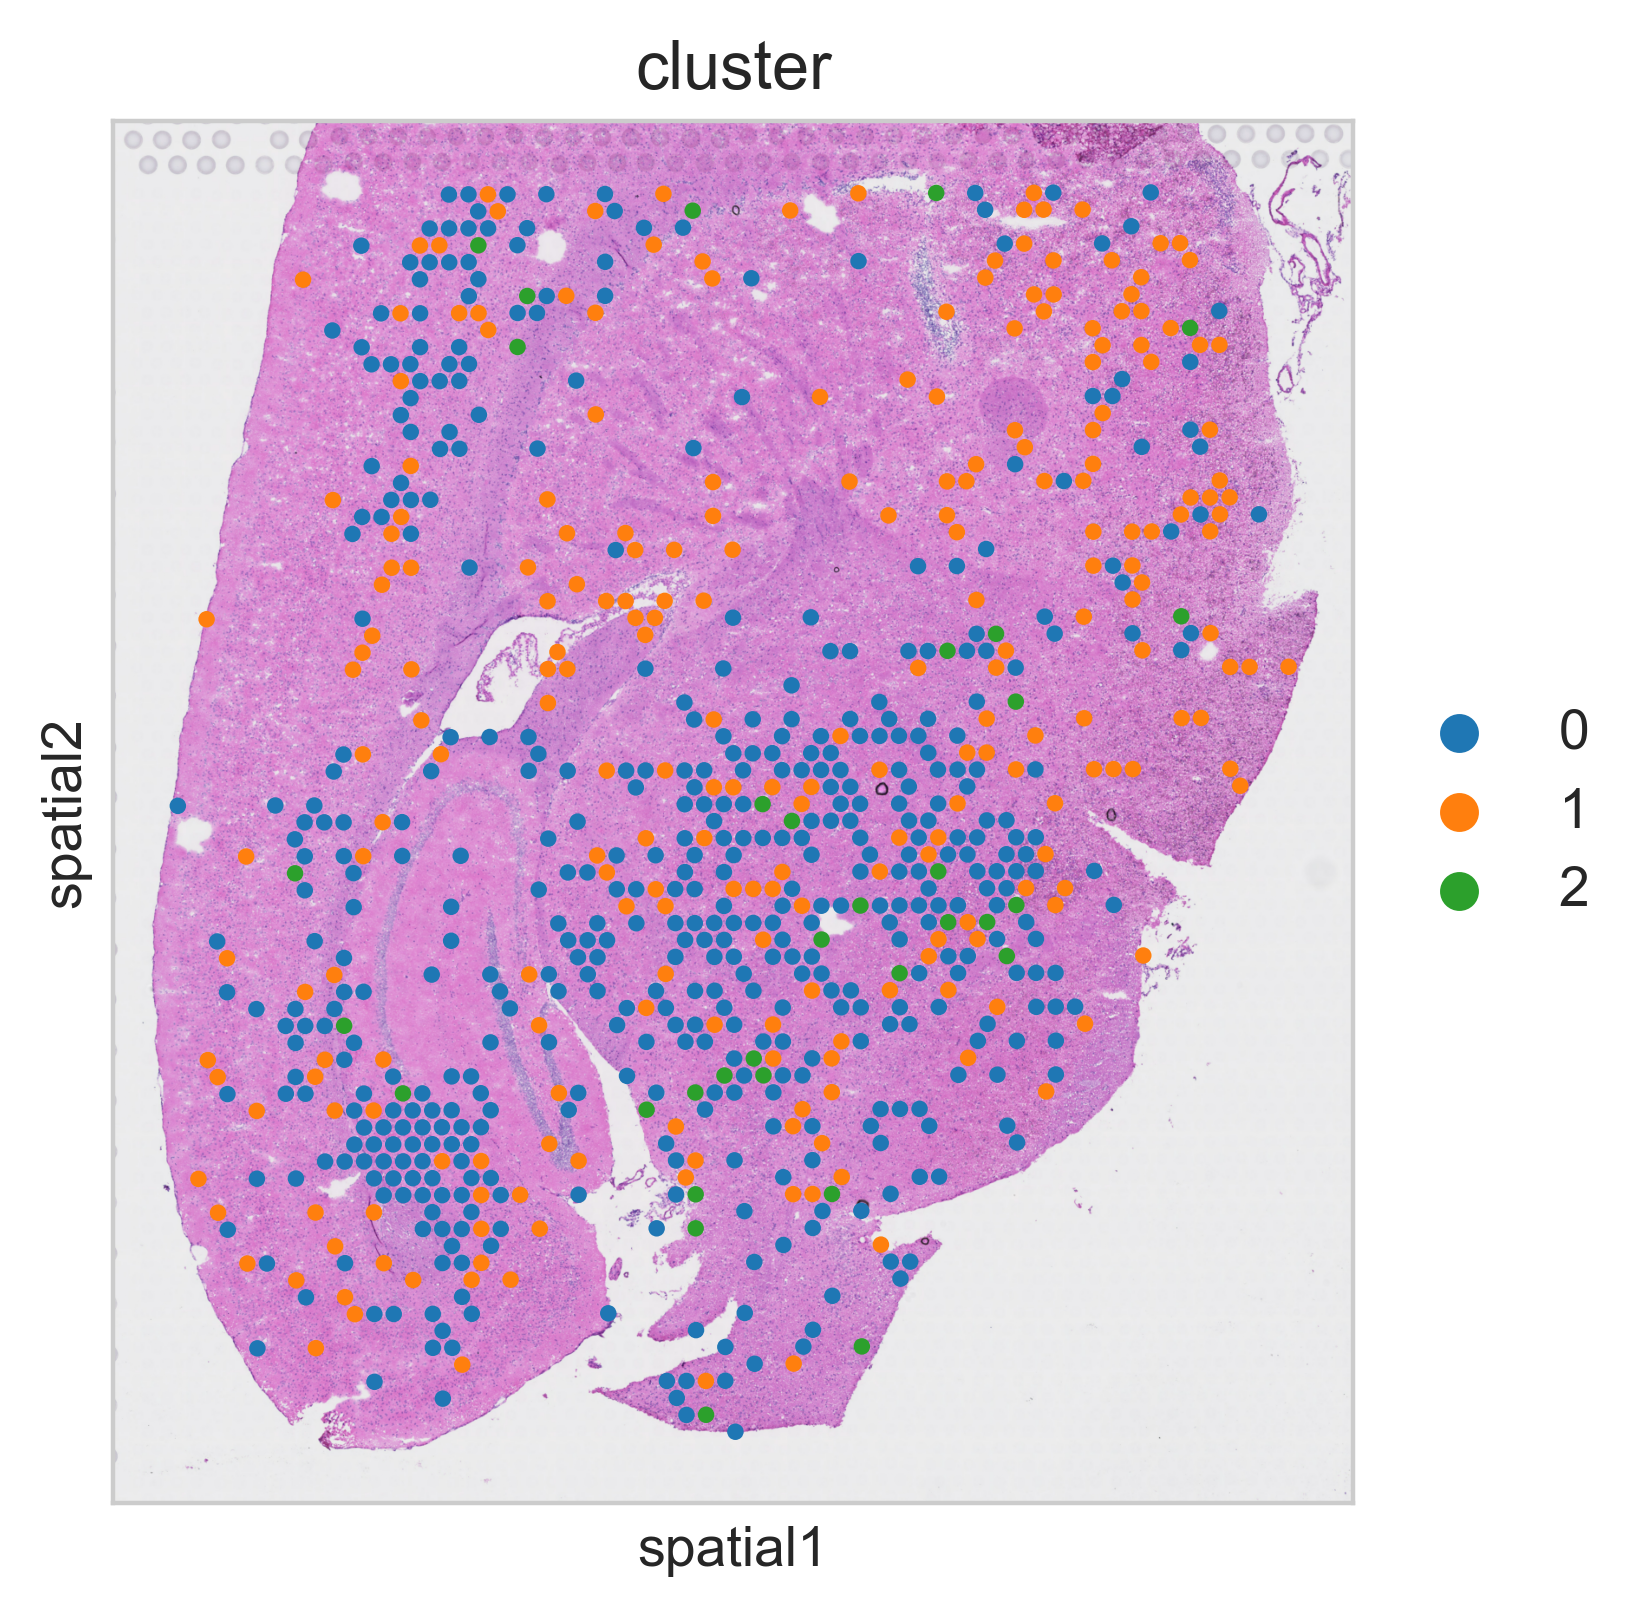

In [21]:
adata_st_temp = adata_st[adata_st.obs['cluster']!='-1']
with mpl.rc_context({'figure.figsize': [4, 4.5], 'figure.dpi': 400}):
    ax = sc.pl.spatial(adata_st_temp, color=['cluster'], img_key='hires', size=1.3, show=False)
    ax[0].get_figure().savefig(results_folder+'Microglia_cluster_simu'+sample_name+'.jpg', bbox_inches='tight')
    mpl.pyplot.show()

In [22]:
img = cv2.imread(f'F:/Ziqian Zheng/Spotiphy_data/ST/Sample{sample_name}/Sample{sample_name}.jpg')
colors = {'1': [180, 119, 31], '2': [14, 127, 255], '3': [44, 160, 44], '0': [40, 39, 214], '5': [189, 103, 148],
          'CP': [180, 119, 31], 'inner': [14, 127, 255], 'outter': [44, 160, 44]}
adata_st_temp = adata_st[adata_st.obs['cluster']!='-1']
img1 = img.copy()
img2 = np.ones(img.shape)
for i in tqdm(range(len(adata_st_temp))):
    cluster = adata_st_temp.obs.iloc[i, -3]
    location = adata_st_temp.obs.iloc[i, -2:]
    alpha = adata_st_temp.obs.iloc[i, -4] * 3
    if alpha > 1:
        alpha = 1.
    cv2.circle(img1, location, int(73*1.3/2), colors[cluster], -1)
    cv2.circle(img2, location, int(73*1.3/2), (alpha, alpha, alpha), -1)

100%|██████████| 767/767 [00:00<00:00, 1972.76it/s]


In [23]:
img = img1 * img2 + img * (1-img2)
img = img.astype(np.int32)
cv2.imwrite(results_folder+'Micro_cluster_simu_trans'+sample_name+'.jpg', img)

True

In [9]:
mpl.pyplot.imshow(img)

### Annotation similarity

In [35]:
sample_name = '221'
results_folder = 'Results/AD Sample '+sample_name+'/decomposition/annotation/'
c2l = pd.read_excel('cell2location.astro_markers.xlsx')
c2l = c2l[c2l['p_val']<0.1]
sp = pd.read_excel(results_folder+'MergeST.astro.ClusterRes_12_markers.xlsx')
sp = sp[sp['p_val']<0.1]
n_marker_c2l = min(c2l['cluster'].value_counts())
n_marker_sp = min(sp['cluster'].value_counts())
cluster_c2l = sorted(list(c2l['cluster'].unique()))
cluster_sp = sorted(list(sp['cluster'].unique()))

In [22]:
similarity = np.zeros((len(cluster_c2l), len(cluster_sp)))
for i, c1 in enumerate(cluster_c2l):
    for j, c2 in enumerate(cluster_sp):
        g1 = list(c2l[c2l['cluster']==c1]['gene'])[:n_marker_c2l]
        g2 = list(sp[sp['cluster']==c2]['gene'])[:n_marker_sp]
        common = set(g1) & set(g2)
        similarity[i, j] = len(common)

In [27]:
c2l['cluster'].value_counts()

cluster
Astro_THAL_lat    336
Astro_CTX         293
Astro_THAL_med    275
Astro_HYPO        258
Astro_AMY_CTX     256
Astro_AMY         214
Astro_WM          199
Astro_HPC         192
Astro_STR         148
Astro_THAL_hab    103
Name: count, dtype: int64

In [24]:
similarity

array([[11.,  2.,  0.,  9., 38., 10., 11.,  5., 30., 11., 12.,  6.],
       [17.,  0.,  1.,  4., 41., 10., 12., 11., 28.,  9.,  9.,  8.],
       [16.,  0.,  3.,  5., 35., 10., 14., 12., 26., 11., 19.,  9.],
       [14.,  1.,  1.,  6., 39., 11.,  8.,  7., 23., 16., 14.,  6.],
       [ 8.,  8.,  6., 19.,  7., 22.,  7., 21., 12.,  7., 11., 21.],
       [16.,  0.,  0.,  3., 31., 10.,  9.,  9., 21.,  9., 11.,  6.],
       [ 9.,  6.,  8., 16.,  9., 21.,  5., 19.,  8., 13.,  9., 17.],
       [10.,  4.,  7., 20., 15., 30.,  8., 29., 12.,  5.,  9., 22.],
       [12.,  5.,  7., 19., 17., 27.,  8., 24.,  8.,  4.,  8., 19.],
       [ 8.,  9.,  6., 10.,  9.,  9.,  3.,  9., 20., 16., 14.,  5.]])

### Mimic ScRNA

In [33]:
sample_name = '221'
results_folder = 'Results/AD Sample '+sample_name+'/decomposition/'
adata_c2l = sc.read_h5ad('F:/Ziqian Zheng/Spotiphy_data/Mimic SCRNA/cell2location.astro.h5ad')
adata_sp1 = sc.read_h5ad('F:/Ziqian Zheng/Spotiphy_data/Decomposed ST/ST_decomposition_221.h5ad')
adata_sp2 = sc.read_h5ad('F:/Ziqian Zheng/Spotiphy_data/Decomposed ST/ST_decomposition_216.h5ad')
adata_sp = ad.concat([adata_sp1, adata_sp2])
adata_sp = adata_sp[adata_sp.obs['cell_type']=='Astro']
del adata_sp1, adata_sp2
common_genes = list(set(adata_sp.var_names).intersection(set(adata_c2l.var_names)))
adata_sp = adata_sp[:, common_genes]
adata_c2l = adata_c2l[:, common_genes]

__init__.py (229): Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
anndata.py (1830): Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [38]:
meta = pd.read_excel(results_folder+"MergeST.astro_meta.xlsx", header=0)
d = {c1:c2 for c1, c2 in zip(meta['spot_name'], meta['ClusterRes'])}
key_cluster='cluster'
adata_sp.obs[key_cluster] = [str(i) for i in adata_sp.obs['spot_name'].map(d)]
adata_c2l.obs[key_cluster] = adata_c2l.obs['annotation_1']
cluster_list_sp = list(sorted(adata_sp.obs[key_cluster].unique(), key=lambda x:int(x)))
cluster_list_c2l = list(sorted(adata_c2l.obs[key_cluster].unique()))

In [47]:
marker_gene_sp = spotiphy.sc_reference.marker_selection_1(adata_sp, key_type=key_cluster, return_dict=True, n_select=30, threshold_p=0.1, 
                                                          threshold_fold=1.2, q=0.15)
marker_gene_list_sp = []
marker_gene_label = []
for type_ in cluster_list_sp:
    marker_gene_list_sp.extend(marker_gene_sp[type_])
    marker_gene_label.extend([type_]*len(marker_gene_sp[type_]))
marker_gene_df = pd.DataFrame({'gene':marker_gene_list_sp, 'label':marker_gene_label})
marker_gene_df.to_csv(results_folder+'marker_gene.csv')
adata_f_sp = adata_sp[:, marker_gene_list_sp]

In [48]:
marker_gene_c2l = spotiphy.sc_reference.marker_selection_1(adata_c2l, key_type=key_cluster, return_dict=True, n_select=30,threshold_p=0.1,
                                                          threshold_fold=1.2, q=0.15)
marker_gene_list_c2l = []
marker_gene_label = []
for type_ in cluster_list_c2l:
    marker_gene_list_c2l.extend(marker_gene_c2l[type_])
    marker_gene_label.extend([type_]*len(marker_gene_c2l[type_]))
marker_gene_df = pd.DataFrame({'gene':marker_gene_list_c2l, 'label':marker_gene_label})
marker_gene_df.to_csv(results_folder+'marker_gene.csv')
adata_f_c2l = adata_c2l[:, marker_gene_list_c2l]

In [45]:
similarity = np.zeros((len(cluster_list_c2l), len(cluster_list_sp)))
for i, c1 in enumerate(cluster_list_c2l):
    for j, c2 in enumerate(cluster_list_sp):
        common = set(marker_gene_c2l[c1]) & set(marker_gene_sp[c2])
        similarity[i, j] = len(common)
similarity

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

12it [00:00, 420.60it/s]


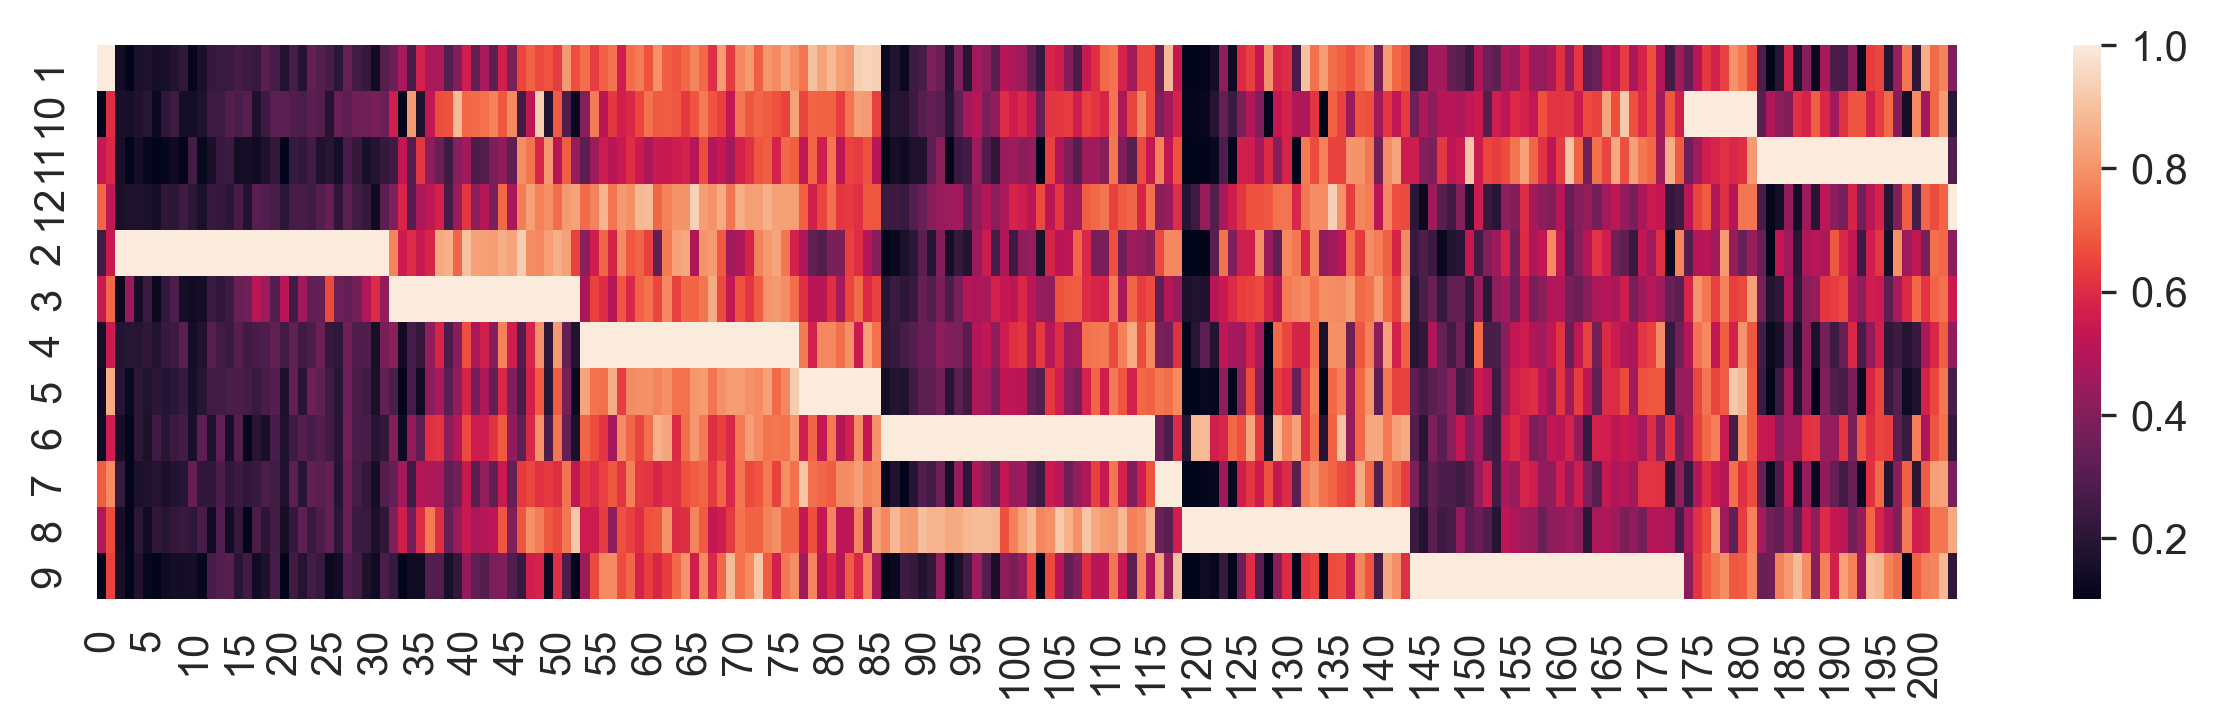

In [49]:
sc_ref_sp = spotiphy.construct_sc_ref(adata_f_sp, key_type=key_cluster)
spotiphy.sc_reference.plot_heatmap(adata_f_sp, key_cluster, save=True, out_dir=results_folder)

10it [00:00, 896.83it/s]


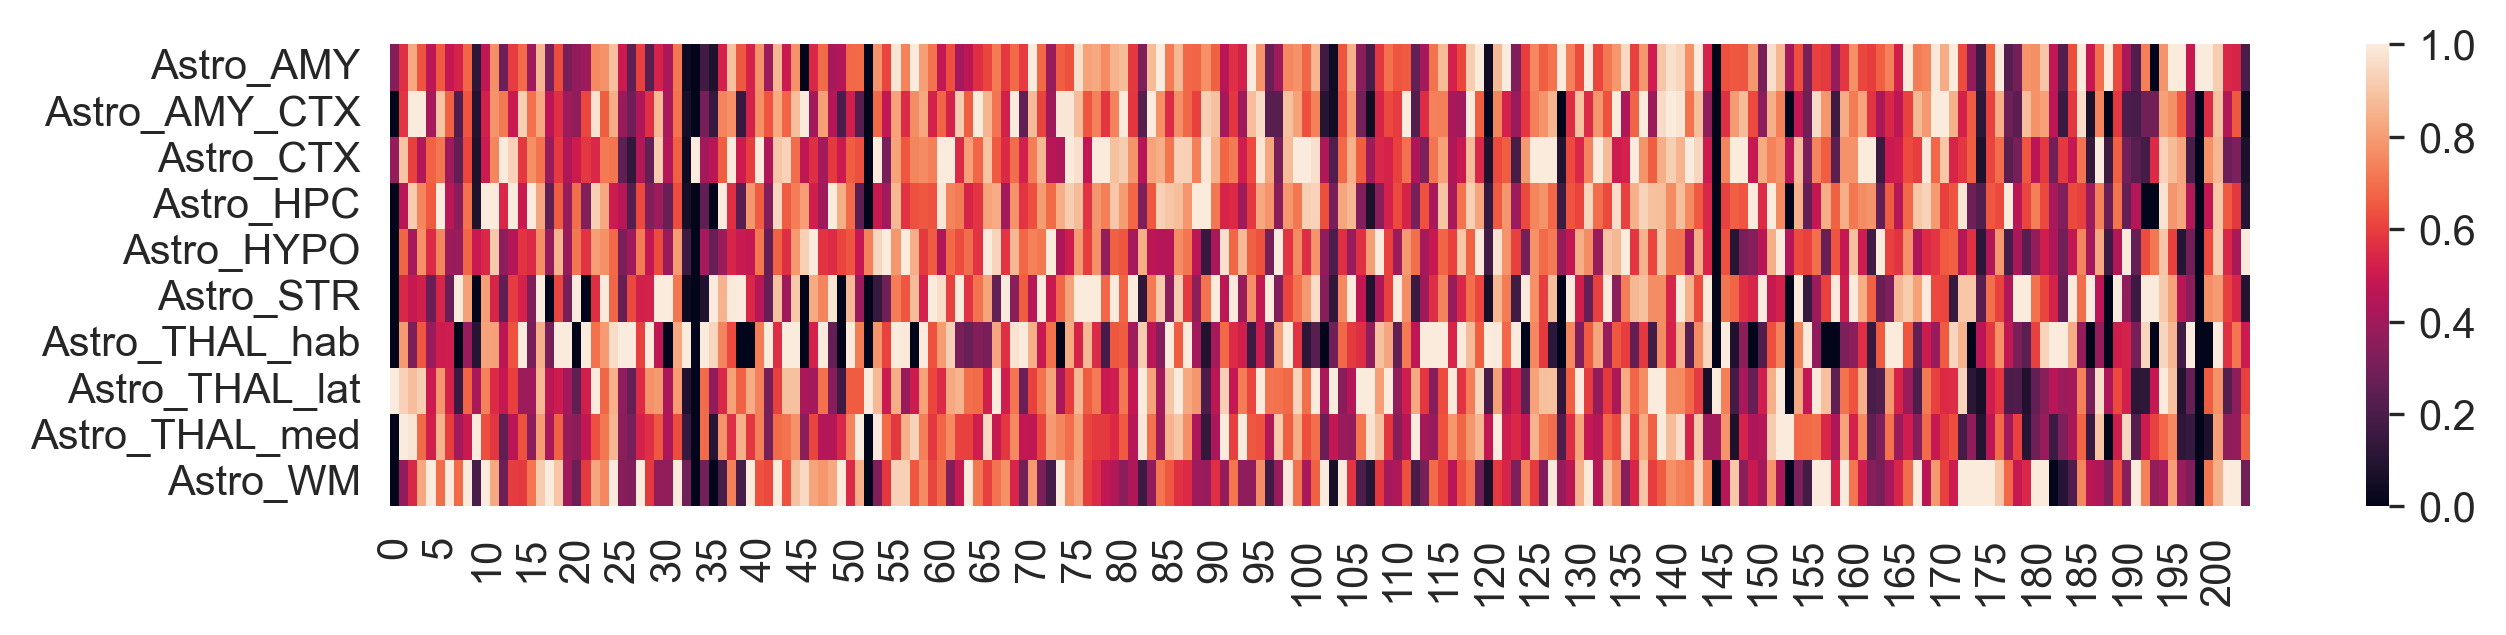

In [50]:
sc_ref_c2l = spotiphy.construct_sc_ref(adata_c2l[:, marker_gene_list_sp], key_type=key_cluster)
spotiphy.sc_reference.plot_heatmap(adata_c2l[:, marker_gene_list_sp], key_cluster, save=True, out_dir=results_folder)